<a href="https://colab.research.google.com/github/hera1228/DAP_2023/blob/main/2023%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%A7%90_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
covid_19_clean_complete = pd.read_csv("/content/covid_19_clean_complete.csv")
country_wise_latest = pd.read_csv("/content/country_wise_latest.csv")
day_wise = pd.read_csv("/content/day_wise.csv")
full_grouped = pd.read_csv("/content/full_grouped.csv")
worldometer_data = pd.read_csv("/content/worldometer_data.csv")
usa_county_data = pd.read_csv("/content/usa_county_wise.csv")



In [ ]:
covid_19_clean_complete.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
worldometer_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
covid_19_clean_complete.groupby('Date').head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe


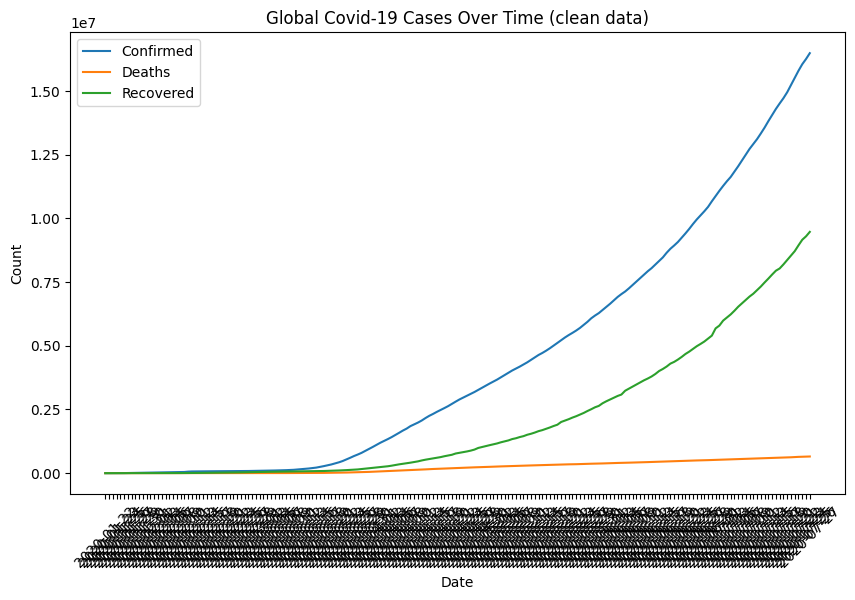

In [ ]:
world_total_clean = covid_19_clean_complete.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=world_total_clean, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=world_total_clean, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=world_total_clean, label='Recovered')
plt.title('Global Covid-19 Cases Over Time (clean data)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
usa_county_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


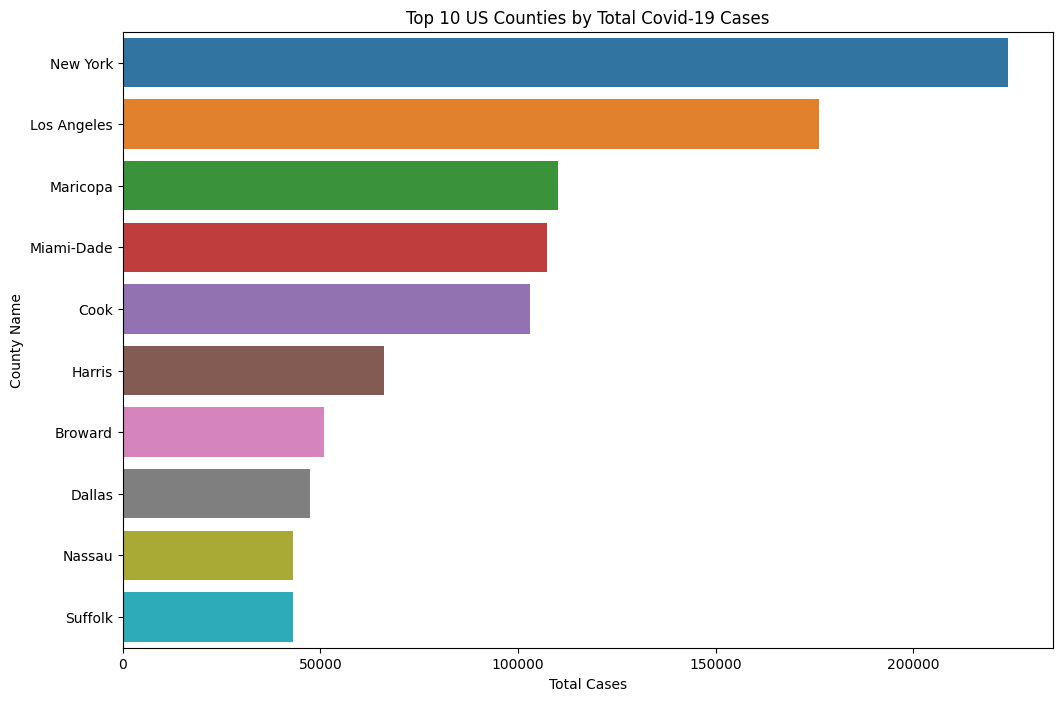

<ipython-input-28-7a7137c3bb09>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_county_data['Date'] = pd.to_datetime(specific_county_data['Date'])
<ipython-input-28-7a7137c3bb09>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_county_data['Confirmed_Increase'] = specific_county_data['Confirmed'].diff()


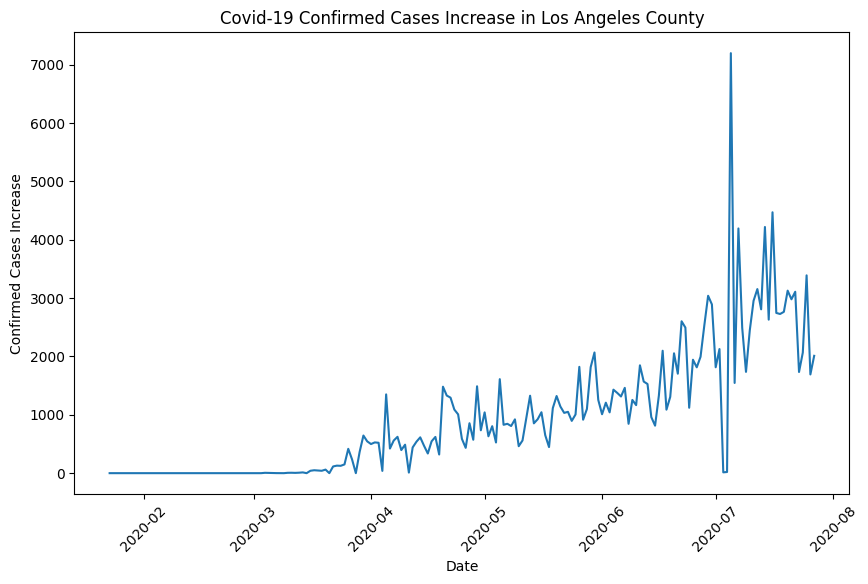

In [ ]:
# 기능 1: 미국 내 다른 군(카운티)의 Covid-19 확진자, 사망자, 회복자 현황 시각화 및 비교

county_data = usa_county_data.groupby('UID').max()

plt.figure(figsize=(12, 8))
sns.barplot(x='Confirmed', y='Admin2', data=county_data.sort_values(by='Confirmed', ascending=False).head(10))
plt.title('Top 10 US Counties by Total Covid-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('County Name')
plt.show()

# 기능 2: 특정 카운티의 확진자 증가율 분석 (예시로 'Los Angeles' 카운티를 선택)
specific_county = 'Los Angeles'
specific_county_data = usa_county_data[usa_county_data['Admin2'] == specific_county]
specific_county_data['Date'] = pd.to_datetime(specific_county_data['Date'])

specific_county_data['Confirmed_Increase'] = specific_county_data['Confirmed'].diff()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed_Increase', data=specific_county_data)
plt.title(f'Covid-19 Confirmed Cases Increase in {specific_county} County')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases Increase')
plt.xticks(rotation=45)
plt.show()

**[제공할 기능] :전 세계 covid-19 백신 접종 현황**
- 국가별 백신 접종 현황 시각화
- 국가 간 백신 보급률 비교
- 백신 유형별 효과성 분석 및 시각화
[사용할 데이터]
- worldmeter_data.csv
[분석 방법]
- 데이터 시각화 : matplotlib, seabron 라이브러리 활용
- 통계 분석
- 비교 분석

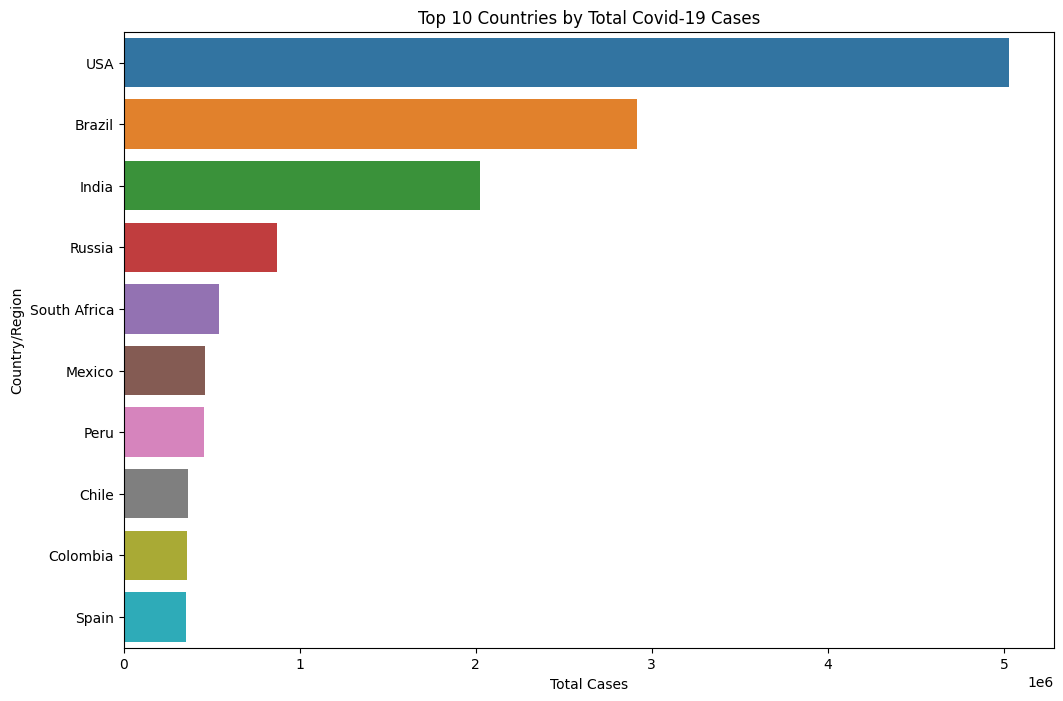

In [ ]:
# 기능 1: 국가별 백신 접종 현황 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalCases', y='Country/Region', data=worldometer_data.sort_values(by='TotalCases', ascending=False).head(10))
plt.title('Top 10 Countries by Total Covid-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country/Region')
plt.show()

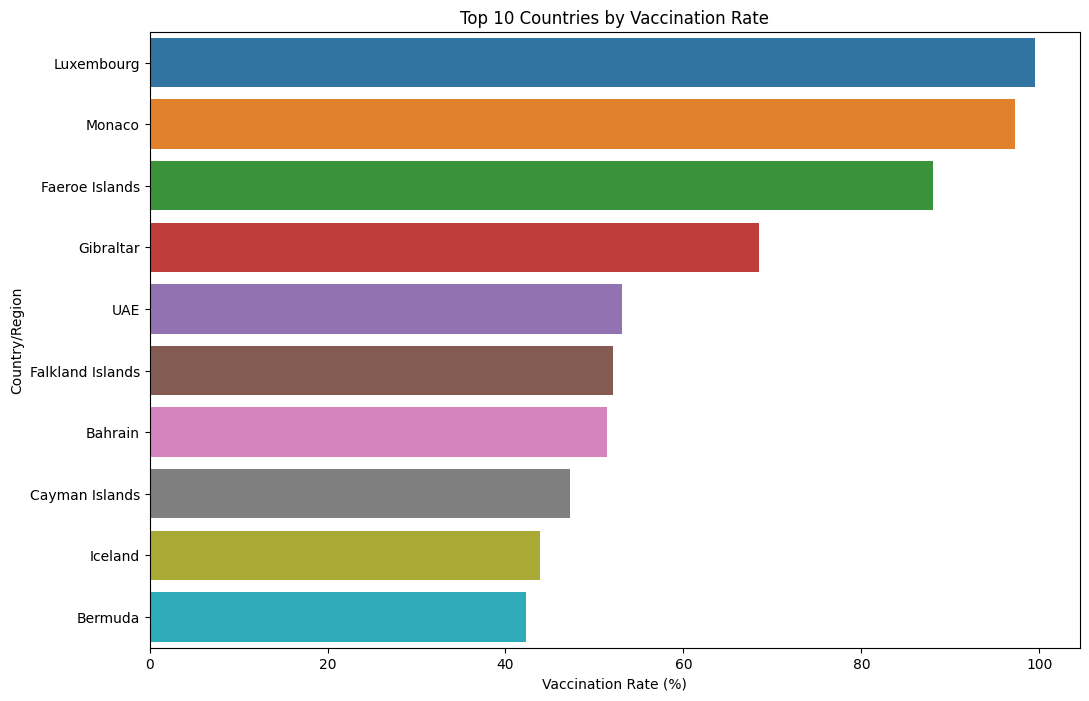

In [ ]:
# 기능 2: 국가 간 백신 보급률 비교
worldometer_data['Vaccination_Rate'] = worldometer_data['TotalTests'] / worldometer_data['Population'] * 100
plt.figure(figsize=(12, 8))
sns.barplot(x='Vaccination_Rate', y='Country/Region', data=worldometer_data.sort_values(by='Vaccination_Rate', ascending=False).head(10))
plt.title('Top 10 Countries by Vaccination Rate')
plt.xlabel('Vaccination Rate (%)')
plt.ylabel('Country/Region')
plt.show()

<ipython-input-36-0558e5df1192>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_effectiveness_data['Effectiveness'] = vaccine_effectiveness_data['TotalRecovered'] / vaccine_effectiveness_data['TotalCases']


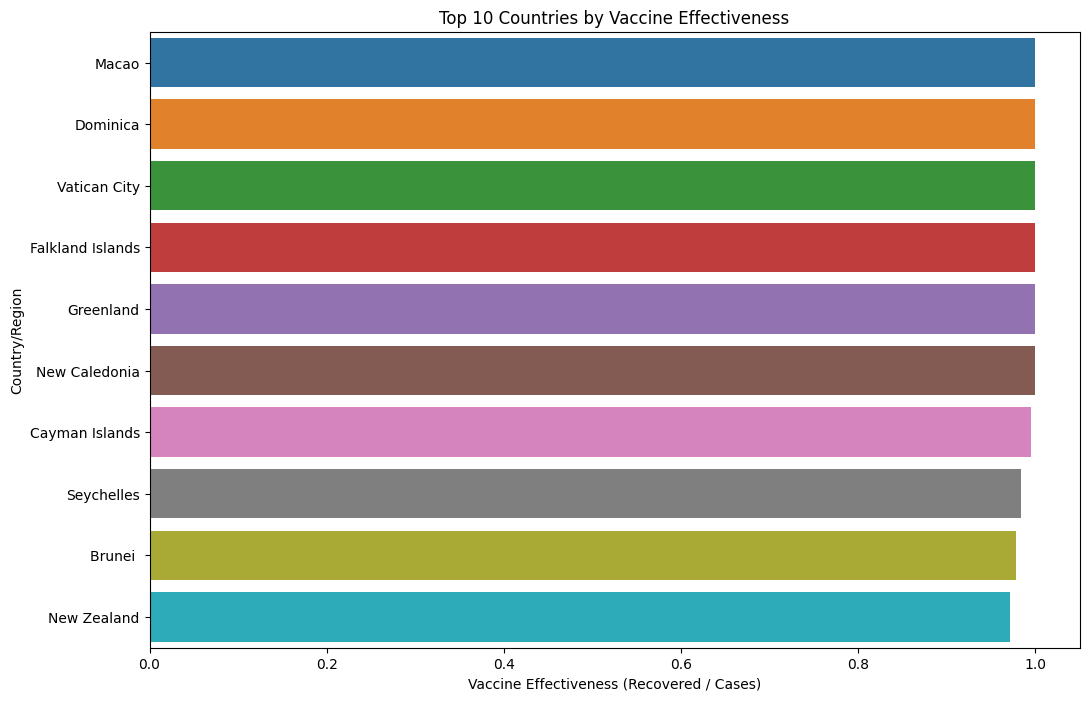

In [ ]:
vaccine_effectiveness_data = worldometer_data[['Country/Region', 'Continent', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'TotalTests', 'WHO Region']]

vaccine_effectiveness_data['Effectiveness'] = vaccine_effectiveness_data['TotalRecovered'] / vaccine_effectiveness_data['TotalCases']

plt.figure(figsize=(12, 8))
sns.barplot(x='Effectiveness', y='Country/Region', data=vaccine_effectiveness_data.sort_values(by='Effectiveness', ascending=False).head(10))
plt.title('Top 10 Countries by Vaccine Effectiveness')
plt.xlabel('Vaccine Effectiveness (Recovered / Cases)')
plt.ylabel('Country/Region')
plt.show()